In [1]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from qlearning import QLearning

In [20]:
start_time = time.time()
env = gym.make('FrozenLake-v0')
model = QLearning(env, lr=0.001, dr=0.99, explr_decay=0.00001, min_explr_rate=0.0001) 
model.learning_settings(1000000, 2000)
model.train()
end_time = time.time()
print("Q Table: ", model.q_table)
print("Learning Time in seconds: ", str(end_time-start_time))

Q Table:  [[0.53135175 0.50510298 0.50450793 0.50065082]
 [0.31578261 0.28738787 0.26256659 0.45181836]
 [0.37967244 0.34827868 0.32622042 0.36599718]
 [0.09951803 0.10054487 0.08551177 0.35053211]
 [0.54771965 0.37469097 0.37294365 0.35649878]
 [0.         0.         0.         0.        ]
 [0.32293266 0.18983213 0.30175307 0.11541098]
 [0.         0.         0.         0.        ]
 [0.37774537 0.40626911 0.3868663  0.57992814]
 [0.43157268 0.63433547 0.44707002 0.38754595]
 [0.60361854 0.49590627 0.39073507 0.31833993]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46802543 0.52705886 0.73925265 0.49051629]
 [0.72646278 0.86311706 0.81106229 0.77682089]
 [0.         0.         0.         0.        ]]
Learning Time in seconds:  915.8690557479858


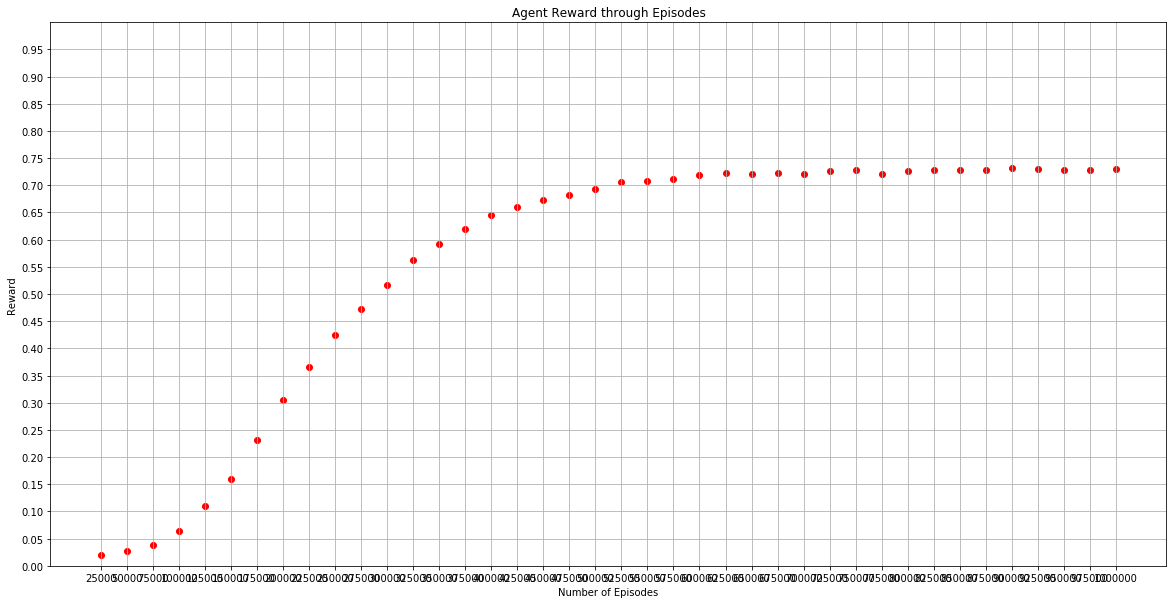

In [21]:
batch_size = 25000
episode_sequence = np.arange(batch_size, model.num_episodes+1, batch_size)
rewards_th = np.split(np.array(model.episodes_rewards), model.num_episodes/batch_size)
rewards = []
for r in rewards_th:
    rewards.append(np.sum(r/batch_size))
plt.figure(figsize=(20,10))
plt.scatter(episode_sequence, rewards, color='red')
plt.grid(True)
plt.xlabel('Number of Episodes')
plt.ylabel('Reward')
plt.xticks(episode_sequence)
plt.yticks(np.arange(0, 1, 0.05))
plt.ylim(0.0, 1.0)
plt.title('Agent Reward through Episodes')
plt.show()

In [17]:
runs = 10000
res = 0
for _ in range(runs):
    res += model.run(render=False)
accuracy = res/runs*100
print('The Goal was reached ' + str(res) + ' times over ' + str(runs) + ' runs. ' + '{:.3f}'.format(accuracy) + '%')

The Goal was reached 7301 times over 10000 runs. 73.010%


In [22]:
def switch(cases, argument):
    return cases.get(argument, -1)
    
actions = {
    0: 'LEFT',
    1: 'DOWN',
    2: 'RIGHT',
    3: 'UP'
    }

state = 0
policy = []

for q_value in model.q_table:
    best_action = np.argmax(q_value)
    policy.append(switch(actions, best_action))

print('The Learned Policy suggests the best actions are the following:')
print(policy[0:4])
print(policy[4:8])
print(policy[8:12])
print(policy[12:16])

print('\nUpon this State Space:')
print('S F F F')
print('F H F H')
print('F F F H')
print('H F F G')


The Learned Policy suggests the best actions are the following:
['LEFT', 'UP', 'LEFT', 'UP']
['LEFT', 'LEFT', 'LEFT', 'LEFT']
['UP', 'DOWN', 'LEFT', 'LEFT']
['LEFT', 'RIGHT', 'DOWN', 'LEFT']

Upon this State Space:
S F F F
F H F H
F F F H
H F F G
